In [11]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

def plot_masks3(image, true_mask, pred_mask, tp_mask, fp_mask, fn_mask):
    # Create a figure and axes for plotting
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))

    # Plot the original image
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')

    # Function to overlay combined masks (green for true, red for pred, blue for intersection)
    def overlay_combined_mask(image, true_mask, pred_mask, opacity=0.5):
        # Ensure the image has 3 channels for RGB
        if image.ndim == 2:  # If grayscale, expand to 3 channels
            image_rgb = np.stack([image] * 3, axis=-1)
        else:
            image_rgb = image.copy()

        # Create color masks for true, pred, and intersection
        color_mask = np.zeros_like(image_rgb)
        
        # Where true_mask is 1 and pred_mask is 1 -> blue (intersection)
        color_mask[(true_mask == 1) & (pred_mask == 1)] = [0, 0, 255]  # Blue
        
        # Where true_mask is 1 and pred_mask is 0 -> green (true mask only)
        color_mask[(true_mask == 1) & (pred_mask == 0)] = [0, 255, 0]  # Green
        
        # Where pred_mask is 1 and true_mask is 0 -> red (pred mask only)
        color_mask[(true_mask == 0) & (pred_mask == 1)] = [255, 0, 0]  # Red

        # Overlay with opacity
        overlay_image = image_rgb.copy()
        mask_condition = (true_mask == 1) | (pred_mask == 1)
        overlay_image[mask_condition] = (1 - opacity) * image_rgb[mask_condition] + opacity * color_mask[mask_condition]

        return overlay_image

    # Plot the true and predicted masks concatenated, with intersection in blue
    combined_overlay = overlay_combined_mask(image, true_mask, pred_mask)
    axes[1].imshow(combined_overlay)
    axes[1].set_title('True Mask (Green), Pred Mask (Red), Intersection (Blue)')

    # Plot the true mask over the original image (green overlay where mask is white)
    true_overlay = overlay_combined_mask(image, true_mask, np.zeros_like(true_mask))
    axes[2].imshow(true_overlay)
    axes[2].set_title('True Mask (Overlay)')

    # Plot the predicted mask over the original image
    pred_overlay = overlay_combined_mask(image, np.zeros_like(pred_mask), pred_mask)
    axes[3].imshow(pred_overlay)
    axes[3].set_title('Predicted Mask (Overlay)')

    # Plot the true positives mask (where prediction and ground truth both match)
    tp_overlay = overlay_combined_mask(image, tp_mask, np.zeros_like(tp_mask))
    axes[4].imshow(tp_overlay)
    axes[4].set_title('True Positives (Overlay)')

    # Turn off axis for all subplots
    for ax in axes:
        ax.axis('off')

    # Show the figure
    plt.tight_layout()
    plt.show()

def plot_masks2(image, true_mask, pred_mask, tp_mask, fp_mask, fn_mask):
    # Create a figure and axes for plotting
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))

    # Plot the original image
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')

    # Function to overlay mask on the original image
    def overlay_mask(image, mask, color=(0, 255, 0), opacity=0.5):
        # Ensure the image has 3 channels for RGB
        if image.ndim == 2:  # If grayscale, expand to 3 channels
            image_rgb = np.stack([image] * 3, axis=-1)
        else:
            image_rgb = image.copy()

        # Create a color mask with the same shape as the image
        color_mask = np.zeros_like(image_rgb)
        color_mask[mask == 1] = color  # Apply green color where the mask is white

        # Overlay with opacity
        overlay_image = image_rgb.copy()
        overlay_image[mask == 1] = (1 - opacity) * image_rgb[mask == 1] + opacity * color_mask[mask == 1]

        return overlay_image

    # Plot the true mask over the original image (green overlay where mask is white)
    true_overlay = overlay_mask(image, true_mask, (0, 255, 0))
    axes[1].imshow(true_overlay)
    axes[1].set_title('True Mask (Overlay)')

    # Plot the predicted mask over the original image
    pred_overlay = overlay_mask(image, pred_mask, (255, 0, 0))
    axes[2].imshow(pred_overlay)
    axes[2].set_title('Predicted Mask (Overlay)')

    # Plot the true positives mask (where prediction and ground truth both match)
    tp_overlay = overlay_mask(image, tp_mask)
    axes[3].imshow(tp_overlay)
    axes[3].set_title('True Positives (Overlay)')

    # Plot the false positives/negatives mask
    fp_overlay = overlay_mask(image, fp_mask)
    axes[4].imshow(fp_overlay)
    axes[4].set_title('False Positives/Negatives (Overlay)')

    # Turn off axis for all subplots
    for ax in axes:
        ax.axis('off')

    # Show the figure
    plt.tight_layout()
    plt.show()

# Helper function to plot masks
def plot_masks(image, true_mask, pred_mask, tp_mask, fp_mask, fn_mask):
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')

    axes[1].imshow(true_mask, cmap='gray')
    axes[1].set_title('True Mask')

    axes[2].imshow(pred_mask, cmap='gray')
    axes[2].set_title('Predicted Mask')

    axes[3].imshow(tp_mask, cmap='gray')
    axes[3].set_title('True Positives')

    axes[4].imshow(fp_mask, cmap='gray')
    axes[4].set_title('False Positives & Negatives')

    for ax in axes:
        ax.axis('off')
    plt.show()

## Simulate a binary segmentation task
#def generate_example():
#    # Image size
#    image = np.zeros((100, 100))
#    
#    # True mask with two objects (trees)
#    true_mask = np.zeros_like(image)
#    true_mask[20:40, 20:40] = 1  # First tree
#    true_mask[60:80, 60:80] = 1  # Second tree
#    
#    # Predicted mask (with some error)
#    pred_mask = np.zeros_like(image)
#    pred_mask[22:38, 22:38] = 1  # First tree (slightly smaller)
#    pred_mask[62:78, 62:78] = 1  # Second tree (slightly smaller)
#    pred_mask[10:15, 10:15] = 1  # False positive (extra object)
#
#    return image, true_mask, pred_mask
#
## Object-wise metric calculation
def calculate_objectwise_metrics(true_mask, pred_mask):
    # Label connected components (objects) in both masks
    labeled_true = label(true_mask)
    labeled_pred = label(pred_mask)

    # Initialize true positives, false positives, and false negatives
    tp_mask = np.zeros_like(true_mask)
    fp_mask = np.zeros_like(true_mask)
    fn_mask = np.zeros_like(true_mask)

    # Match predicted objects with true objects using Intersection over Union (IoU)
    true_objects = np.unique(labeled_true)[1:]  # Exclude background (label 0)
    pred_objects = np.unique(labeled_pred)[1:]

    true_positive_count = 0
    false_positive_count = 0
    false_negative_count = 0

    for pred_obj in pred_objects:
        pred_obj_mask = labeled_pred == pred_obj
        iou_scores = []
        for true_obj in true_objects:
            true_obj_mask = labeled_true == true_obj
            intersection = np.logical_and(pred_obj_mask, true_obj_mask).sum()
            union = np.logical_or(pred_obj_mask, true_obj_mask).sum()
            iou = intersection / union if union > 0 else 0
            iou_scores.append(iou)

        max_iou = max(iou_scores) if iou_scores else 0
        if max_iou > 0.5:
            true_positive_count += 1
            tp_mask[pred_obj_mask] = 1
        else:
            false_positive_count += 1
            fp_mask[pred_obj_mask] = 1

    for true_obj in true_objects:
        true_obj_mask = labeled_true == true_obj
        if not np.logical_and(true_obj_mask, pred_mask).any():
            false_negative_count += 1
            fn_mask[true_obj_mask] = 1

    precision = true_positive_count / (true_positive_count + false_positive_count) if true_positive_count + false_positive_count > 0 else 0
    recall = true_positive_count / (true_positive_count + false_negative_count) if true_positive_count + false_negative_count > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0

    return precision, recall, f1, tp_mask, fp_mask, fn_mask

# Main function to generate example and visualize
#def main():
#    image, true_mask, pred_mask = generate_example()
#    precision, recall, f1, tp_mask, fp_mask, fn_mask = calculate_objectwise_metrics(true_mask, pred_mask)
#
#    print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}')
#    
#    # Visualize
#    plot_masks(image, true_mask, pred_mask, tp_mask, fp_mask + fn_mask)
#
#if __name__ == '__main__':
#    main()


In [81]:
import os
import torch
import torch.nn.functional as F
from tqdm import tqdm
from models import biomed_UNet as UNet
from torch.utils.data import DataLoader
from models.biomed_UNet.datasets import ImageDataset
from models.biomed_UNet.unet_model import load_model

valid_set_path = '../data/2024-09-29-seg-dataset-200/val'
val_set = ImageDataset(valid_set_path)

batch_size = 1
lr = 1e-8
scale = 1
val = 0.1
amp = False
bilinear = False

#benchmark_model = UNet.from_pretrained(
#    'aerial-image-categorization/tree-detection_biomed-benchmark',
#    'cpu'
#)
model = UNet.model(UNet.config(n_channels=3, n_classes=2, bilinear=bilinear))
load_model(
    model,
    'checkpoints_unet-biomed-200-n1-200_2024-10-05_21-11/checkpoint_epoch15.pth',
    'cpu'
)

loader_args = dict(batch_size=batch_size, num_workers=os.cpu_count(), pin_memory=True)
#train_loader = DataLoader(train_set, shuffle=True, **loader_args)
val_loader = DataLoader(val_set, shuffle=False, drop_last=True, **loader_args)
for index, batch in enumerate(val_loader):
    if index == 1:
        image, mask_true = batch['image'], batch['mask']
        img_coords = batch['image_coords']

# move images and labels to correct device and type
image = image.to(device='cpu', dtype=torch.float32, memory_format=torch.channels_last)
mask_true = mask_true.to(device='cpu', dtype=torch.long)
# predict the mask
with torch.no_grad():
    mask_pred = model(image).cpu()
    
        
#if net.n_classes == 1:
#    assert mask_true.min() >= 0 and mask_true.max() <= 1, 'True mask indices should be in [0, 1]'
#    mask_pred = (torch.sigmoid(mask_pred) > 0.5).float()
#    # compute the Dice score
#    mask_true = mask_true.unsqueeze(1)
#    #print(mask_pred.shape)
#    #print(mask_true.shape)
#    
#    dice_score += dice_coeff(mask_pred, mask_true, reduce_batch_first=False)
#    
#    accuracy, precision, recall, f1 = calculate_pixelwise_classification_metrics(
#        mask_pred,
#        mask_true
#    )
#    total_px_accuracy += accuracy
#    total_px_precision += precision
#    total_px_recall += recall
#    total_px_f1 += f1
#    accuracy, precision, recall, f1 = calculate_objectwise_classification_metrics(
#        mask_pred.squeeze(1),
#        mask_true.squeeze(1),
#        threshold = 0.5
#    )
#        total_ob_accuracy += accuracy
#        total_ob_precision += precision
#        total_ob_recall += recall
#        total_ob_f1 += f1
#    else:
#        assert mask_true.min() >= 0 and mask_true.max() < net.n_classes, 'True mask indices should be in [0, n_classes['
#        # convert to one-hot format
#        mask_true = F.one_hot(mask_true, net.n_classes).permute(0, 3, 1, 2).float()
#        mask_pred = F.one_hot(mask_pred.argmax(dim=1), net.n_classes).permute(0, 3, 1, 2).float()
#        accuracy, precision, recall, f1 = calculate_pixelwise_classification_metrics(
#            mask_pred[:, 1:],
#            mask_true[:, 1:]
#        )
#        total_px_accuracy += accuracy
#        total_px_precision += precision
#        total_px_recall += recall
#        total_px_f1 += f1
#        accuracy, precision, recall, f1 = calculate_objectwise_classification_metrics2(
#            mask_pred[:, 1:],
#            mask_true[:, 1:],
#            threshold = 0.5
#        )
#        total_ob_accuracy += accuracy
#        total_ob_precision += precision
#        total_ob_recall += recall
#        total_ob_f1 += f1
#        # compute the Dice score, ignoring background
#        #dice_score += multiclass_dice_coeff(mask_pred[:, 1:], mask_true[:, 1:], reduce_batch_first=False)
#        dice_score += multiclass_jaccard_coeff(mask_pred[:, 1:], mask_true[:, 1:], reduce_batch_first=False)

In [103]:
mask_true

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]])

In [104]:
mask_pred

tensor([[[[ 3.7194,  3.8401,  3.8805,  ...,  3.6561,  3.7093,  3.0655],
          [ 3.8188,  3.9612,  3.8362,  ...,  3.6385,  3.3482,  3.7098],
          [ 3.8629,  3.9416,  3.9317,  ...,  3.4127,  3.5360,  3.5233],
          ...,
          [ 3.8047,  3.9025,  3.7903,  ...,  3.7913,  3.8684,  3.6013],
          [ 3.8227,  3.9112,  3.8131,  ...,  3.8272,  3.9625,  3.4696],
          [ 3.7474,  3.8274,  3.8161,  ...,  3.7414,  3.6545,  3.5146]],

         [[-3.9735, -4.0215, -3.9868,  ..., -3.8737, -3.7037, -3.3482],
          [-3.9885, -4.0265, -3.9095,  ..., -3.8156, -3.8496, -3.8129],
          [-4.0093, -3.9981, -3.9158,  ..., -3.9624, -3.7831, -3.9625],
          ...,
          [-3.9707, -3.9660, -3.8906,  ..., -3.9384, -4.0053, -3.8266],
          [-4.0068, -4.0223, -3.9489,  ..., -4.0061, -4.0825, -3.7457],
          [-3.9338, -3.9742, -3.9792,  ..., -4.0058, -3.9409, -3.8331]]]])

In [26]:
import torch.nn.functional as F

#output = F.interpolate(mask_pred, (full_img.size[1], full_img.size[0]), mode='bilinear')
output = mask_pred
if model.n_classes > 1:
    mask = output.argmax(dim=1)
else:
    mask = torch.sigmoid(output) > out_threshold

mod_mask = mask[0].long().squeeze().numpy()
mod_mask.max()

1

In [245]:
s_mask_pred = (torch.sigmoid(mask_pred) > 0.5).float()
s_mask_pred

tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]])

In [44]:
o_mask_pred = F.one_hot(mask_pred.argmax(dim=1), model.n_classes).permute(0, 3, 1, 2).float()
o_mask_pred

tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]])

In [29]:
model.n_classes

2

In [ ]:
ImageDataset.preprocess([0,1], Image.fromarray(), scale, is_mask)

In [48]:
s_mask_pred = s_mask_pred[0].long().squeeze()#.numpy()
s_mask_pred

tensor([[[1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1],
         ...,
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]])

In [74]:
mask_true.squeeze(0).numpy().shape

(200, 200)

In [72]:
mod_mask.shape

(200, 200)

In [60]:
s_mask_pred.long().numpy().shape

(1, 2, 200, 200)

In [27]:
precision, recall, f1, tp_mask, fp_mask, fn_mask = calculate_objectwise_metrics(
    mask_true.squeeze(0).numpy(),
    mod_mask
)

In [28]:
img_coords = [x.numpy()[0] for x in img_coords]

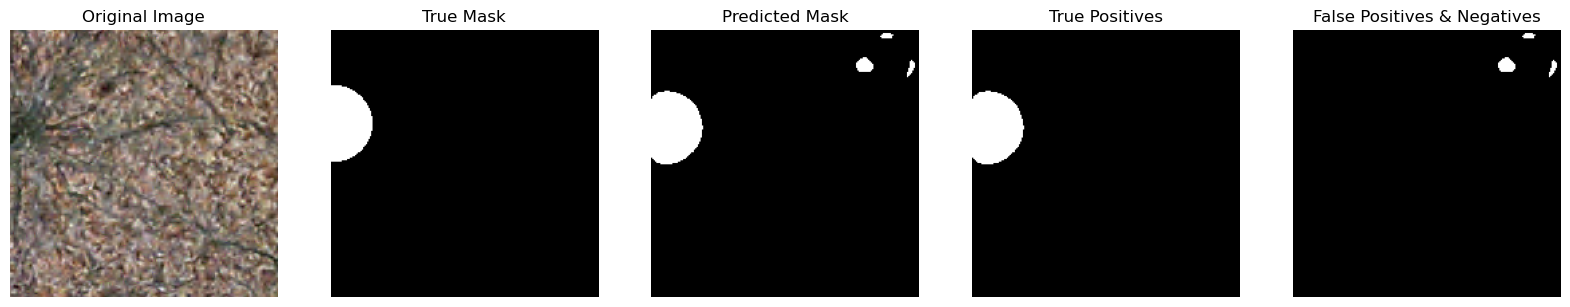

In [29]:
from PIL import Image
plot_masks(
    np.array(Image.open(f'../data/2024-09-29-seg-dataset-200/val/images/tile_tif_{img_coords[0]}_{img_coords[1]}.png')),
    mask_true.squeeze(0).numpy(),
    mod_mask,
    tp_mask,
    fp_mask,
    fn_mask
)

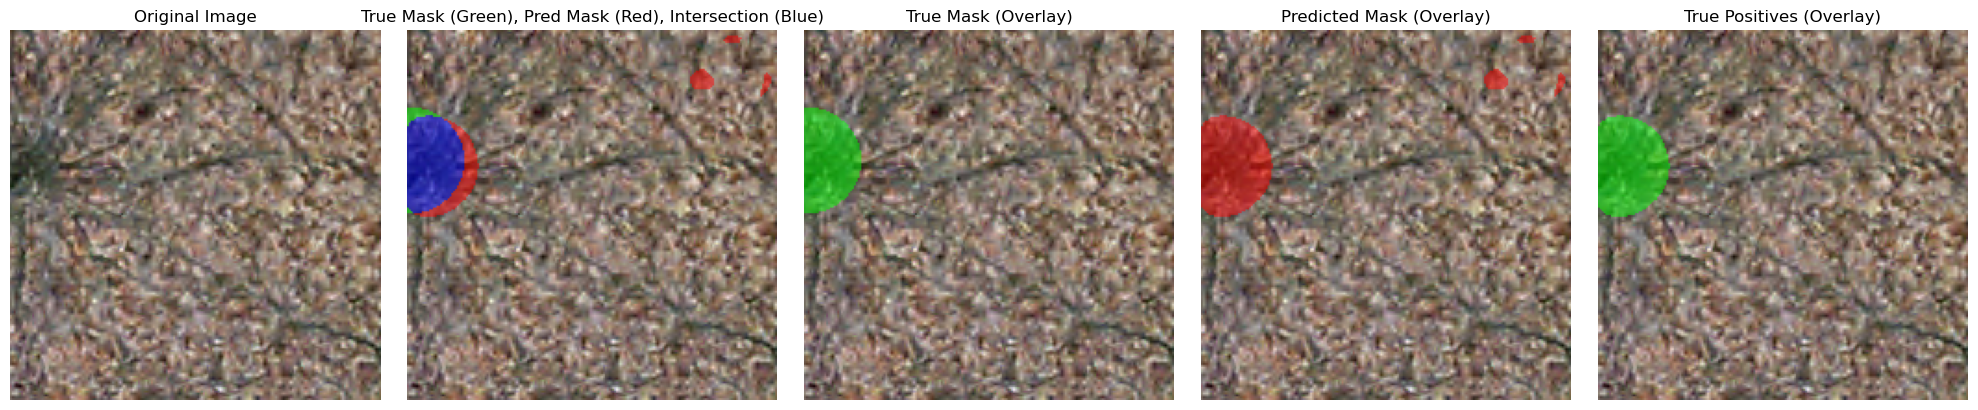

0.25 1.0 0.4


In [30]:
plot_masks3(
    np.array(Image.open(f'../data/2024-09-29-seg-dataset-200/val/images/tile_tif_{img_coords[0]}_{img_coords[1]}.png')),
    mask_true.squeeze(0).numpy(),
    mod_mask,
    tp_mask,
    fp_mask,
    fn_mask
)
print(precision, recall, f1)

In [140]:
precision

0.3333333333333333

In [141]:
recall

1.0

In [160]:
mod_mask.shape
mod_mask.dtype

dtype('uint8')

In [148]:
gray_image_array = np.full((100, 100), 128, dtype=np.int32)
gray_image_array.shape

(100, 100)

In [151]:
print("Original data type:", gray_image_array.dtype)

# Convert to uint8 if necessary
if mod_mask.dtype != np.uint8:
    mod_mask = mod_mask.astype(np.uint8)

Original data type: uint8


In [165]:
mod_mask.max()

1

In [ ]:
mod_mask.to

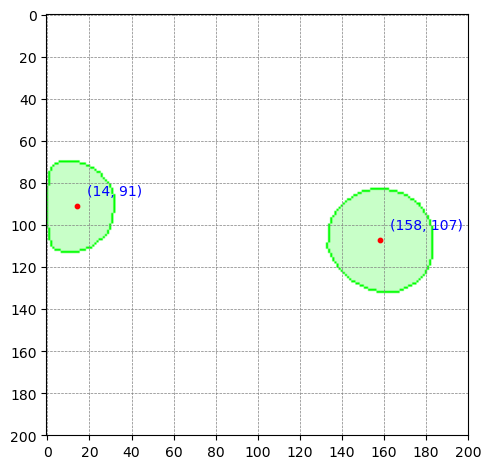

[(158, 107), (14, 91)]

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

def mask_to_image(mask: np.ndarray, mask_values):
    """
    Converts a mask to a PIL image using specified mask values.
    """
    if isinstance(mask_values[0], list):
        out = np.zeros((mask.shape[-2], mask.shape[-1], len(mask_values[0])), dtype=np.uint8)
    elif mask_values == [0, 1]:
        out = np.zeros((mask.shape[-2], mask.shape[-1]), dtype=bool)
    else:
        out = np.zeros((mask.shape[-2], mask.shape[-1]), dtype=np.uint8)

    if mask.ndim == 3:
        mask = np.argmax(mask, axis=0)

    for i, v in enumerate(mask_values):
        out[mask == i] = v

    return Image.fromarray(out)

def getPoints_fromPNG(img):
    """
    Processes an image to find contours, centroids, and plots the results.
    """
    # Convert image to RGB for consistent plotting
    out_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
    ## 1. Original Image
    #plt.figure(figsize=(15, 10))
    #plt.subplot(2, 3, 1)
    #plt.imshow(out_img)
    #plt.title('Original Image')
    #plt.axis('off')
#
    ## 2. Convert to Grayscale
    img_gray = img  # Since the input is already grayscale
    #plt.subplot(2, 3, 2)
    #plt.imshow(img_gray, cmap='gray')
    #plt.title('Grayscale Image')
    #plt.axis('off')
#
    ## 3. Thresholding to get Binary Image
    _, img_binary = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY)
    #plt.subplot(2, 3, 3)
    #plt.imshow(img_binary, cmap='gray')
    #plt.title('Binary Image')
    #plt.axis('off')
#
    ## 4. Find Contours
    contours, _ = cv2.findContours(img_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Create a copy of the image to draw contours
    img_contours = img_gray.copy()
    cv2.drawContours(out_img, contours, -1, (0, 255, 0), 1)  # Draw contours in green
    #plt.subplot(2, 3, 4)
    #plt.imshow(out_img)
    #plt.title('Contours')
    #plt.axis('off')

    # 5. Calculate centroids and mark them
    white_dot_centers = []
    for contour in contours:
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            white_dot_centers.append((cX, cY))
            #cv2.circle(out_img, (cX, cY), 2, (255, 0, 0), -1)  # Draw centroids in red

    # Set the background to white
    # Plot the image with contours and centroids
    #plt.subplot(2, 3, 5)
    green_color = np.array([200, 255, 200])  # Green color in RGB
    opacity = 0.99  # Define your opacity level (0 to 1)
    
    # Create a mask for white pixels
    white_mask = np.all(out_img == [255, 255, 255], axis=-1)
    out_img[white_mask] = (1 - opacity) * out_img[white_mask] + opacity * green_color
    
    out_img[np.all(out_img == [0, 0, 0], axis=-1)] = [255, 255, 255]
    plt.imshow(out_img)
    
    # Mark the centroids and label them
    for (x, y) in white_dot_centers:
        plt.scatter(x, y, color='red', marker='o', s=10)  # Mark the center
        plt.text(x + 5, y - 5, f'({x}, {y})', color='blue', fontsize=10)
    
    # Add grid and custom ticks
    plt.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)
    ticks = np.arange(0, 201, 20)
    plt.xticks(ticks)
    plt.yticks(ticks)
    # Invert y-axis to start from bottom
    #plt.gca().invert_yaxis()

    #plt.title('Contours with Centroids and Grid')
    plt.axis('on')

    plt.tight_layout()
    plt.show()

    return white_dot_centers

# Example Usage
pil_image = mask_to_image(
    mask=mod_mask,  # Replace `mod_mask` with your actual mask data
    mask_values=[0, 255]
)

image_array = np.array(pil_image)

# Convert to OpenCV image (if not already)
if len(image_array.shape) == 3 and image_array.shape[2] == 3:  # Check if the image has 3 channels
    cv2_image = cv2.cvtColor(image_array, cv2.COLOR_RGB2BGR)
else:
    cv2_image = image_array 

getPoints_fromPNG(cv2_image)


In [64]:
import torch
from torch import Tensor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def dice_coeff(input: Tensor, target: Tensor, reduce_batch_first: bool = False, epsilon: float = 1e-6):
    # Average of Dice coefficient for all batches, or for a single mask
    assert input.size() == target.size()
    assert input.dim() == 3 or not reduce_batch_first

    sum_dim = (-1, -2) if input.dim() == 2 or not reduce_batch_first else (-1, -2, -3)

    inter = 2 * (input * target).sum(dim=sum_dim)
    sets_sum = input.sum(dim=sum_dim) + target.sum(dim=sum_dim)
    sets_sum = torch.where(sets_sum == 0, inter, sets_sum)

    dice = (inter + epsilon) / (sets_sum + epsilon)
    return dice.mean()


def multiclass_dice_coeff(input: Tensor, target: Tensor, reduce_batch_first: bool = False, epsilon: float = 1e-6):
    # Average of Dice coefficient for all classes
    return dice_coeff(input.flatten(0, 1), target.flatten(0, 1), reduce_batch_first, epsilon)

In [31]:
multiclass_dice_coeff(F.one_hot(mask_pred.argmax(dim=1), model.n_classes).permute(0, 3, 1, 2).float(), F.one_hot(mask_true, model.n_classes).permute(0, 3, 1, 2).float(), reduce_batch_first=False)

tensor(0.8948)

In [38]:
dice_coeff(
    mask_pred.argmax(dim=1)[0].long().squeeze(),
    mask_true.squeeze(0),
    reduce_batch_first=False)

dice_coeff(
    F.one_hot(mask_pred.argmax(dim=1), model.n_classes).permute(0, 3, 1, 2).float().flatten(0, 1),
    F.one_hot(mask_true, model.n_classes).permute(0, 3, 1, 2).float().flatten(0, 1),
    reduce_batch_first=False
)

tensor(0.8948)

tensor(0.8948)

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

# Synthetic example size
height, width = 10, 10
n_classes = 2  # Binary classification

# Generate random predicted mask and true mask
np.random.seed(0)  # For reproducibility
mask_true = np.random.randint(0, n_classes, size=(height, width)).astype(np.int64)  # True mask
mask_pred = np.random.rand(height, width, n_classes)  # Random probabilities for each class
mask_pred = np.argmax(mask_pred, axis=-1)  # Predicted mask (class indices)

# Convert to PyTorch tensors
mask_true_tensor = torch.tensor(mask_true).unsqueeze(0)  # Shape [1, H, W]
mask_pred_tensor = torch.tensor(mask_pred).unsqueeze(0)  # Shape [1, H, W]

# Method 1: Direct comparison
dice_coeff_1 = dice_coeff(
    mask_pred_tensor[0].long().squeeze(),  # Shape [H, W]
    mask_true_tensor.squeeze(0),  # Shape [H, W]
    reduce_batch_first=False
)

# Method 2: One-hot encoding
mask_pred_one_hot = F.one_hot(mask_pred_tensor.argmax(dim=1), n_classes).permute(0, 3, 1, 2).float()
mask_true_one_hot = F.one_hot(mask_true_tensor, n_classes).permute(0, 3, 1, 2).float()

dice_coeff_2 = dice_coeff(
    mask_pred_one_hot.flatten(0, 1),  # Shape [1 * n_classes, H * W]
    mask_true_one_hot.flatten(0, 1),  # Shape [1 * n_classes, H * W]
    reduce_batch_first=False
)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot true mask
axes[0].imshow(mask_true, cmap='gray', interpolation='nearest')
axes[0].set_title("True Mask")
axes[0].axis("off")

# Plot predicted mask
axes[1].imshow(mask_pred, cmap='gray', interpolation='nearest')
axes[1].set_title("Predicted Mask")
axes[1].axis("off")

# Plot Dice coefficients
axes[2].bar(["Method 1", "Method 2"], [dice_coeff_1.item(), dice_coeff_2.item()])
axes[2].set_title("Dice Coefficient Comparison")
axes[2].set_ylabel("Dice Coefficient")

plt.tight_layout()
plt.show()


RuntimeError: Class values must be smaller than num_classes.

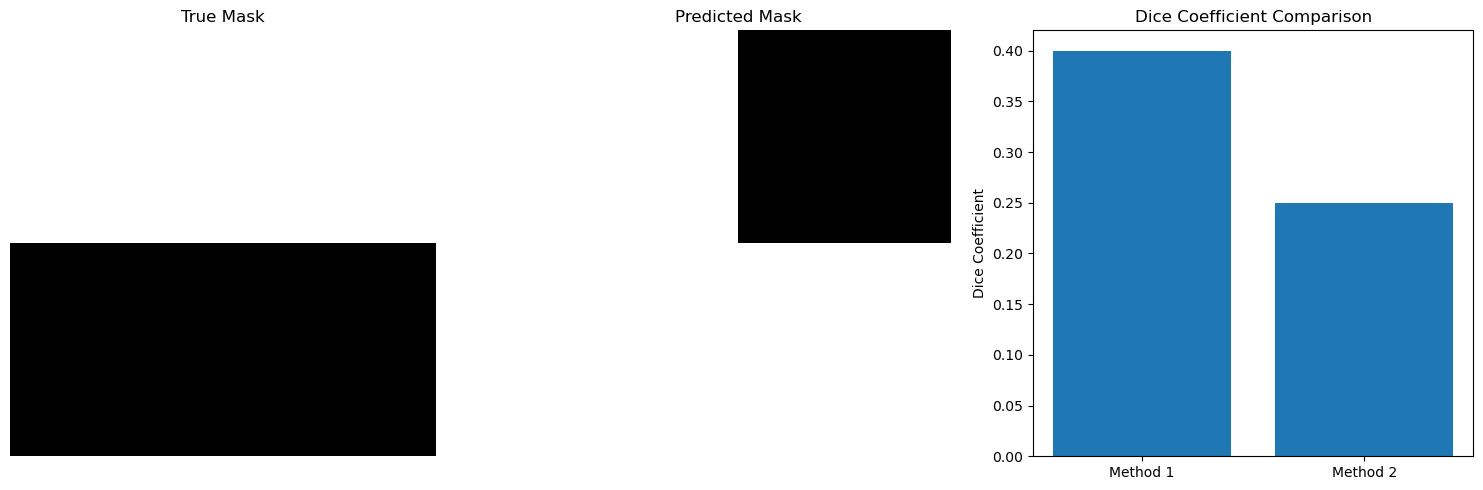

[0.40000012516975403, 0.25000008940696716]


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

# Synthetic example size
height, width = 2, 2
n_classes = 2  # Binary classification

# Generate random predicted mask and true mask
np.random.seed(1)  # For reproducibility
mask_true = np.random.randint(0, n_classes, size=(height, width)).astype(np.int64)  # True mask
mask_pred_prob = np.random.rand(height, width, n_classes)  # Random probabilities for each class
mask_pred = np.argmax(mask_pred_prob, axis=-1)  # Predicted mask (class indices)

# Convert to PyTorch tensors
mask_true_tensor = torch.tensor(mask_true).unsqueeze(0)  # Shape [1, H, W]
mask_pred_tensor = torch.tensor(mask_pred).unsqueeze(0)  # Shape [1, H, W]

# Method 1: Direct comparison
dice_coeff_1 = dice_coeff(
    mask_pred_tensor[0].long().squeeze(),  # Shape [H, W]
    mask_true_tensor.squeeze(0),  # Shape [H, W]
    reduce_batch_first=False
)

# Method 2: One-hot encoding
# Correcting the one-hot encoding step
mask_pred_one_hot = F.one_hot(mask_pred_tensor[0], n_classes).float()  # Shape [H, W, n_classes]
mask_true_one_hot = F.one_hot(mask_true_tensor[0], n_classes).float()  # Shape [H, W, n_classes]

# Now permute to get to shape [n_classes, H, W]
mask_pred_one_hot = mask_pred_one_hot.permute(2, 0, 1)  # Shape [n_classes, H, W]
mask_true_one_hot = mask_true_one_hot.permute(2, 0, 1)  # Shape [n_classes, H, W]

# Flattening the masks for Dice calculation
dice_coeff_2 = dice_coeff(
    mask_pred_one_hot.flatten(0, 1),  # Shape [n_classes, H*W]
    mask_true_one_hot.flatten(0, 1),  # Shape [n_classes, H*W]
    reduce_batch_first=False
)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot true mask
axes[0].imshow(mask_true, cmap='gray', interpolation='nearest')
axes[0].set_title("True Mask")
axes[0].axis("off")

# Plot predicted mask
axes[1].imshow(mask_pred, cmap='gray', interpolation='nearest')
axes[1].set_title("Predicted Mask")
axes[1].axis("off")

# Plot Dice coefficients
axes[2].bar(["Method 1", "Method 2"], [dice_coeff_1.item(), dice_coeff_2.item()])
axes[2].set_title("Dice Coefficient Comparison")
axes[2].set_ylabel("Dice Coefficient")

plt.tight_layout()
plt.show()
print([dice_coeff_1.item(), dice_coeff_2.item()])

In [50]:
mask_true = np.random.randint(0, n_classes, size=(height, width)).astype(np.int64)

In [51]:
mask_true.shape

(2, 2)

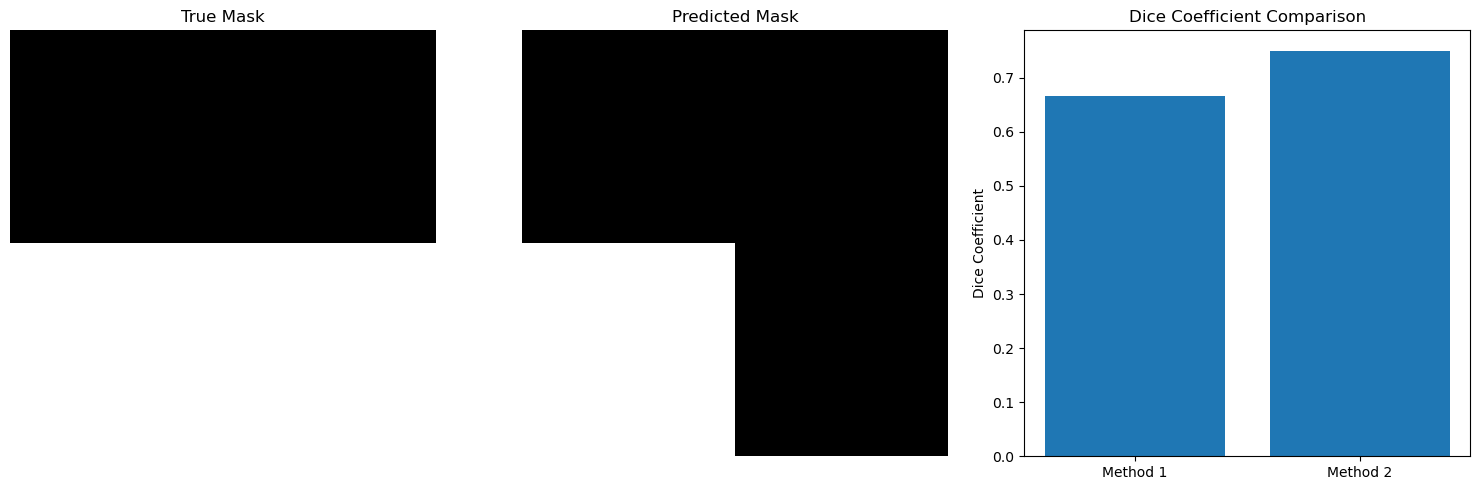

[0.6666667461395264, 0.75]


In [67]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

# Synthetic example size
height, width = 2, 2
n_classes = 2  # Binary classification

# Generate random predicted mask and true mask
mask_true_i = np.array([[0,0],
                        [1,1]])
mask_pred_i = np.array([[0,0],
                        [1,0]])
mask_true = mask_true_i
mask_pred = mask_pred_i  # Predicted mask (class indices)

# Convert to PyTorch tensors
mask_true_tensor = torch.tensor(mask_true).unsqueeze(0)  # Shape [1, H, W]
mask_pred_tensor = torch.tensor(mask_pred).unsqueeze(0)  # Shape [1, H, W]

# Method 1: Direct comparison
dice_coeff_1 = dice_coeff(
    mask_pred_tensor[0].long().squeeze(),  # Shape [H, W]
    mask_true_tensor.squeeze(0),  # Shape [H, W]
    reduce_batch_first=False
)

# Method 2: One-hot encoding
# Correcting the one-hot encoding step
mask_pred_one_hot = F.one_hot(mask_pred_tensor[0], n_classes).float()  # Shape [H, W, n_classes]
mask_true_one_hot = F.one_hot(mask_true_tensor[0], n_classes).float()  # Shape [H, W, n_classes]

# Now permute to get to shape [n_classes, H, W]
mask_pred_one_hot = mask_pred_one_hot.permute(2, 0, 1)  # Shape [n_classes, H, W]
mask_true_one_hot = mask_true_one_hot.permute(2, 0, 1)  # Shape [n_classes, H, W]

# Flattening the masks for Dice calculation
dice_coeff_2 = dice_coeff(
    mask_pred_one_hot.flatten(0, 1),  # Shape [n_classes, H*W]
    mask_true_one_hot.flatten(0, 1),  # Shape [n_classes, H*W]
    reduce_batch_first=False
)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot true mask
axes[0].imshow(mask_true, cmap='gray', interpolation='nearest')
axes[0].set_title("True Mask")
axes[0].axis("off")

# Plot predicted mask
axes[1].imshow(mask_pred, cmap='gray', interpolation='nearest')
axes[1].set_title("Predicted Mask")
axes[1].axis("off")

# Plot Dice coefficients
axes[2].bar(["Method 1", "Method 2"], [dice_coeff_1.item(), dice_coeff_2.item()])
axes[2].set_title("Dice Coefficient Comparison")
axes[2].set_ylabel("Dice Coefficient")

plt.tight_layout()
plt.show()
print([dice_coeff_1.item(), dice_coeff_2.item()])

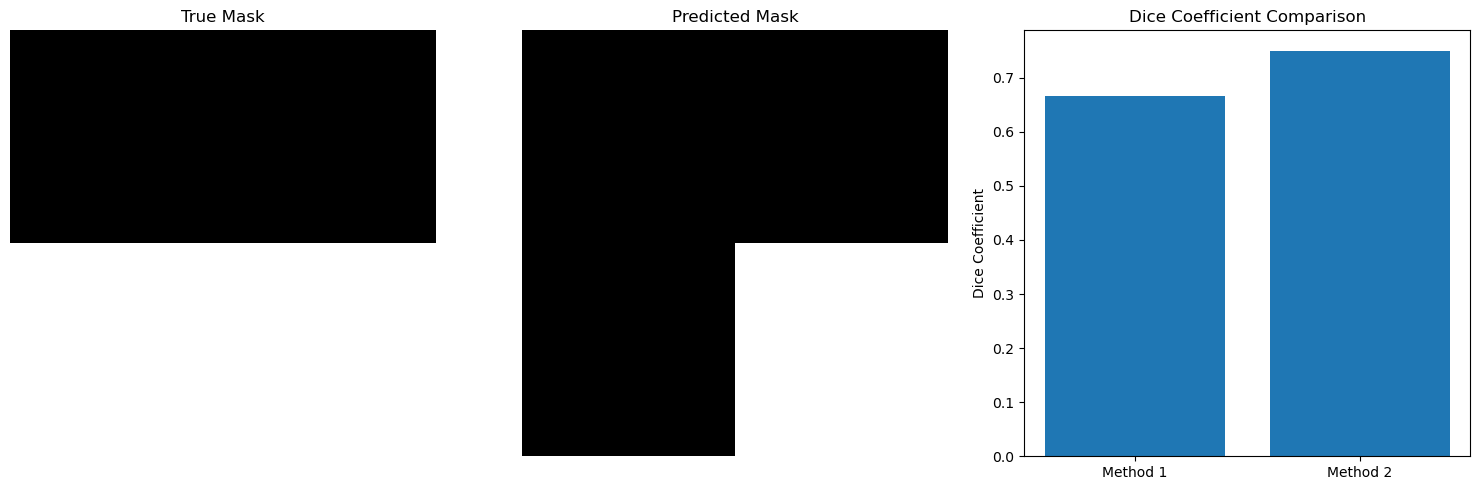

IoU Score: 0.5
Dice Coefficients: [0.6666667461395264, 0.75]


RuntimeError: number of dims don't match in permute

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

# Synthetic example size
height, width = 2, 2
n_classes = 2  # Binary classification

# Generate random predicted mask and true mask
mask_true_i = np.array([[0,0],
                        [1,1]])
mask_pred_i = np.array([[0,0],
                        [0,1]])
mask_true = mask_true_i
mask_pred = mask_pred_i  # Predicted mask (class indices)

# Convert to PyTorch tensors
mask_true_tensor = torch.tensor(mask_true).unsqueeze(0)  # Shape [1, H, W]
mask_pred_tensor = torch.tensor(mask_pred).unsqueeze(0)  # Shape [1, H, W]

# IoU calculation
def calculate_iou(mask_true, mask_pred):
    intersection = torch.sum((mask_true == 1) & (mask_pred == 1)).item()
    union = torch.sum((mask_true == 1) | (mask_pred == 1)).item()
    iou = intersection / union if union > 0 else 0  # Avoid division by zero
    return iou

# Calculate IoU
iou_score = calculate_iou(mask_true_tensor[0], mask_pred_tensor[0])


# Method 1: Direct comparison
dice_coeff_1 = dice_coeff(
    mask_pred_tensor[0].long().squeeze(),  # Shape [H, W]
    mask_true_tensor.squeeze(0),  # Shape [H, W]
    reduce_batch_first=False
)

# Method 2: One-hot encoding
# Correcting the one-hot encoding step
mask_pred_one_hot = F.one_hot(mask_pred_tensor[0], n_classes).float()  # Shape [H, W, n_classes]
mask_true_one_hot = F.one_hot(mask_true_tensor[0], n_classes).float()  # Shape [H, W, n_classes]

# Now permute to get to shape [n_classes, H, W]
mask_pred_one_hot = mask_pred_one_hot.permute(2, 0, 1)  # Shape [n_classes, H, W]
mask_true_one_hot = mask_true_one_hot.permute(2, 0, 1)  # Shape [n_classes, H, W]

# Flattening the masks for Dice calculation
dice_coeff_2 = dice_coeff(
    mask_pred_one_hot.flatten(0, 1),  # Shape [n_classes, H*W]
    mask_true_one_hot.flatten(0, 1),  # Shape [n_classes, H*W]
    reduce_batch_first=False
)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot true mask
axes[0].imshow(mask_true, cmap='gray', interpolation='nearest')
axes[0].set_title("True Mask")
axes[0].axis("off")

# Plot predicted mask
axes[1].imshow(mask_pred, cmap='gray', interpolation='nearest')
axes[1].set_title("Predicted Mask")
axes[1].axis("off")

# Plot Dice coefficients
axes[2].bar(["Method 1", "Method 2"], [dice_coeff_1.item(), dice_coeff_2.item()])
axes[2].set_title("Dice Coefficient Comparison")
axes[2].set_ylabel("Dice Coefficient")

plt.tight_layout()
plt.show()

# Output IoU and Dice scores
print("IoU Score:", iou_score)
print("Dice Coefficients:", [dice_coeff_1.item(), dice_coeff_2.item()])
mask_true_old = F.one_hot(torch.tensor(mask_true), 3).permute(0, 3, 1, 2).float()
mask_pred_old = F.one_hot(torch.tensor(mask_pred).argmax(dim=1), 3).permute(0, 3, 1, 2).float()
dice_coeff(
    mask_pred_old.flatten(0, 1),  # Shape [n_classes, H*W]
    mask_true_old.flatten(0, 1),  # Shape [n_classes, H*W]
    reduce_batch_first=False
)


In [93]:
mask_pred.shape

torch.Size([1, 2, 200, 200])

In [89]:
mask_pred[0,0]

tensor([[3.5449, 3.5504, 3.7661,  ..., 3.9596, 3.9267, 3.7179],
        [3.1955, 3.5372, 3.3304,  ..., 3.8762, 3.9162, 3.8575],
        [3.4098, 3.3557, 3.6198,  ..., 3.8156, 3.8772, 3.8616],
        ...,
        [3.4369, 3.7052, 3.6073,  ..., 3.8500, 3.8671, 3.4431],
        [3.4304, 3.3222, 3.5888,  ..., 3.6344, 3.9133, 3.3976],
        [2.8455, 3.2668, 3.2761,  ..., 3.5983, 3.5464, 3.5642]])

In [90]:
mask_true_old = F.one_hot(mask_true, 2).permute(0, 3, 1, 2).float()
mask_pred_old = F.one_hot(mask_pred.argmax(dim=1), 2).permute(0, 3, 1, 2).float()
dice_coeff(
    mask_pred_old.flatten(0, 1),  # Shape [n_classes, H*W]
    mask_true_old.flatten(0, 1),  # Shape [n_classes, H*W]
    reduce_batch_first=False
)

tensor(0.8948)

In [91]:
mask_true_i = np.array(
    [
        [
            [0,0],
            [1,1]
        ],
        [
            [0,0],
            [0,0]
        ]
    ]
)
mask_pred_i = np.array(
    [
        [
            [0,0],
            [1,0]
        ],
        [
            [0,0],
            [0,0]
        ]
    ]
)

In [95]:
mask_true_i = torch.tensor(mask_true_i).unsqueeze(0)
mask_pred_i = torch.tensor(mask_pred_i).unsqueeze(0)

In [96]:
mask_true_old = F.one_hot(mask_true_i, 2).permute(0, 3, 1, 2).float()
mask_pred_old = F.one_hot(mask_pred_i.argmax(dim=1), 2).permute(0, 3, 1, 2).float()
dice_coeff(
    mask_pred_old.flatten(0, 1),  # Shape [n_classes, H*W]
    mask_true_old.flatten(0, 1),  # Shape [n_classes, H*W]
    reduce_batch_first=False
)

RuntimeError: number of dims don't match in permute

In [97]:
import torch
import torch.nn.functional as F

# Assuming mask_true_i and mask_pred_i are defined as before
mask_true_i = torch.tensor(
    [
        [0, 0],
        [1, 1]
    ]
)
mask_pred_i = torch.tensor(
    [
        [0, 1],
        [1, 1]
    ]
)

# One-hot encode the masks
mask_true_old = F.one_hot(mask_true_i, 2)  # Shape [H, W, num_classes]
mask_pred_old = F.one_hot(mask_pred_i, 2)  # Shape [H, W, num_classes]

# Correctly permute to [num_classes, H, W]
mask_true_old = mask_true_old.permute(2, 0, 1).float()  # Shape: [num_classes, H, W]
mask_pred_old = mask_pred_old.permute(2, 0, 1).float()  # Shape: [num_classes, H, W]

# You can then use these in your dice coefficient calculation
dice_coeff_value = dice_coeff(
    mask_pred_old.flatten(0, 1),  # Shape [num_classes, H*W]
    mask_true_old.flatten(0, 1),  # Shape [num_classes, H*W]
    reduce_batch_first=False
)

print("Dice Coefficient:", dice_coeff_value)


Dice Coefficient: tensor(0.7500)


In [98]:
# Convert to PyTorch tensors
mask_true_tensor = torch.tensor(mask_true_i).unsqueeze(0)  # Shape [1, H, W]
mask_pred_tensor = torch.tensor(mask_pred_i).unsqueeze(0)  # Shape [1, H, W]

# Method 1: Direct comparison
dice_coeff_1 = dice_coeff(
    mask_pred_tensor[0].long().squeeze(),  # Shape [H, W]
    mask_true_tensor.squeeze(0),  # Shape [H, W]
    reduce_batch_first=False
)

/tmp/ipykernel_325003/3480710178.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask_true_tensor = torch.tensor(mask_true_i).unsqueeze(0)  # Shape [1, H, W]
/tmp/ipykernel_325003/3480710178.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask_pred_tensor = torch.tensor(mask_pred_i).unsqueeze(0)  # Shape [1, H, W]


In [99]:
dice_coeff_1

tensor(0.8000)